In [1]:
from sklearn import datasets
import numpy as np
# Irisデータセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# 一意なクラスラベルを出力
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
# エポック数40、学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

/Users/haifaxiuping/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [7]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [8]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット'
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとのサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        # 全てのサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

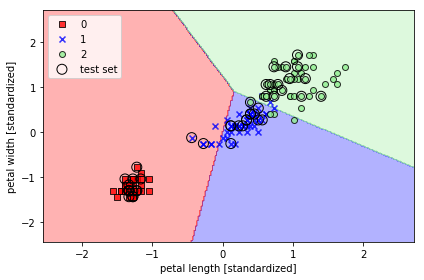

In [10]:
# トレーニングデータとテストデータの特徴量を行方向に統合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを統合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# グラフの表示
plt.tight_layout()
plt.show()

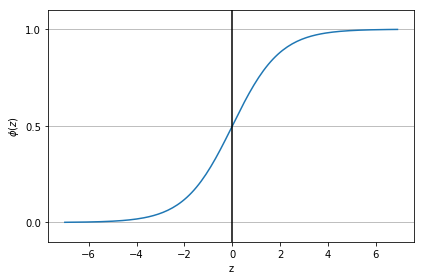

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))

# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)
# 垂直線を追加（z=0）
plt.axvline(0.0, color='k')
# y軸の上限/下限を設定
plt.ylim(-0.1, 1.1)
# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y軸のメモリを追加
plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクトの取得
ax = plt.gca()
# y軸の目盛に合わせて水平グリッド線を追加
ax.yaxis.grid(True)
# グラフを表示
plt.tight_layout()
plt.show()

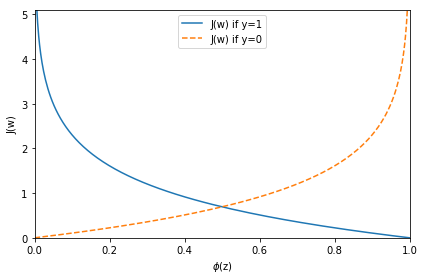

In [12]:
# y=1のコストを計算する関数
def cost_1(z):
    return - np.log(sigmoid(z))

# y=0のコストを計算する関数
def cost_0(z):
    return - np.log(1 - sigmoid(z))

# 0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10, 10, 0.1)
# シグモイド関数を実行
phi_z = sigmoid(z)
# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]
# 結果をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')
# y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]
# 結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
# x軸とy軸の上限/下限を設定
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
# 軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
# 凡例を設定
plt.legend(loc='upper center')
# グラフを表示
plt.tight_layout()
plt.show()

In [13]:
class LogisticRegressionGD(object):
    """ 勾配降下法に基づくロジスティック回帰分類器
    
    パラメータ
    ----------
    eta: float
        学習率（0.0より大きく1,0以下の値）
    n_iter: int
        重みを初期化するための乱数シード
        
    属性
    ----------
    w_: １次元配列
        適合後の重み
    cost_: リスト
        各エポックでの誤差平方和コスト関数
        
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 乱数シードを固定にするrandom_state
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        ----------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y: 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        # トレーニング回数分のトレーニングデータを反復処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            # エポックごとのコストを格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ 総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ ロジスティックシグモイド活性化関数を計算"""
        return 1. /(1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """ １ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 以下に等しい：
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

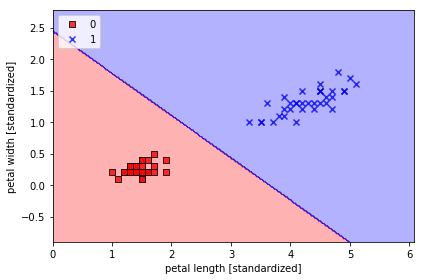

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンスを生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルをトレーニングデータに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)
# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)
# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定（左上に配置）
plt.legend(loc='upper left')
# グラフを表示
plt.tight_layout()
plt.show()

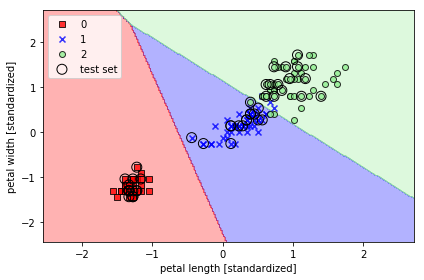

In [15]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1)
# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105,150))
# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定（左上に配置）
plt.legend(loc='upper left')
# グラフを表示
plt.tight_layout()
plt.show()

In [16]:
lr.predict_proba(X_test_std[:3, :])

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

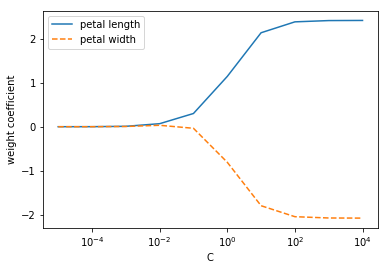

In [20]:
# 空のリストを生成（重み生成、逆正則化パラメータ）
weights, params = [], []
# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    # 重み係数を格納
    weights.append(lr.coef_[1])
    # 逆正則化パラメータを格納
    params.append(10.**c)
    
# 重み係数をNumpy配列に変換
weights = np.array(weights)
# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
# 横軸を対数スケールに変換
plt.xscale('log')
plt.show()

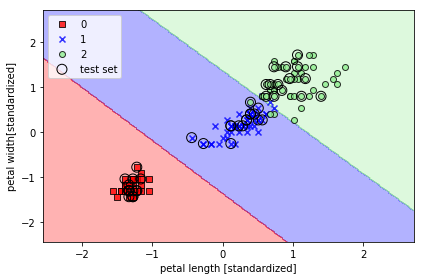

In [21]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
svm = SVC(kernel='linear', C=1.0, random_state=1)
# 線形SVMのモデルにトレーニングデータを適合させる
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import SGDClassifier
# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')
# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
# 確率的勾配降下法バージョンのSVM（損失関数＝ヒンジ関数）を生成
svm = SGDClassifier(loss='hinge')

/Users/haifaxiuping/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


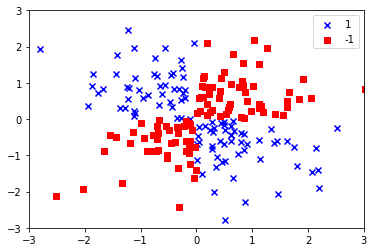

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# 乱数シードを指定
np.random.seed(1)
# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)
# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 排他的論理和の値が真の場合は1, 偽の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)
# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, -1],
           c='b', marker='x', label='1')
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
# 軸の範囲を指定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout
plt.show()

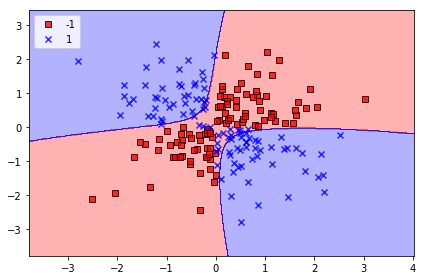

In [28]:
# RBFカーネルによるSVMのインスタンスを生成
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

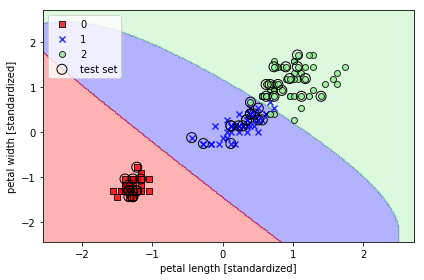

In [35]:
# RBFカーネルによるSVMのインスタンスを生成（２つのパラメータを変更）
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

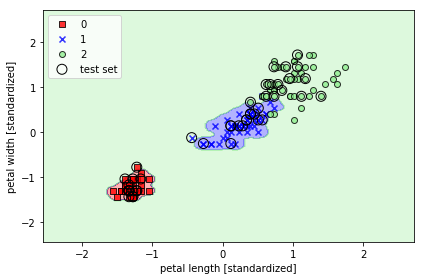

In [37]:
# RBFカーネルによるSVMのインスタンスを生成（２つのパラメータを変更）
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

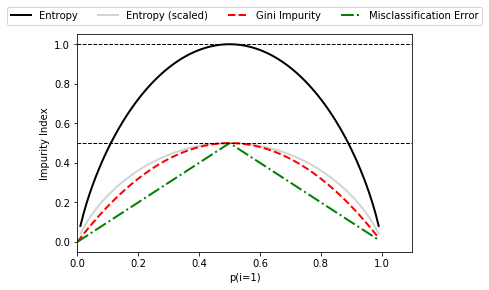

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# ジニ不純度の関数を定義
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1 - p))

# エントロピーの関数を定義
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)
# 配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
# エントロピー（2種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                         'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=5, fancybox=True, shadow=False)
# 2本の水平の波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
# 横軸の上限 / 下限を設定
plt.xlim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

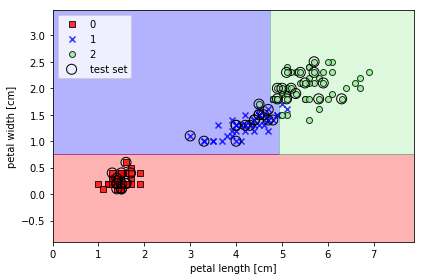

In [52]:
from sklearn.tree import DecisionTreeClassifier
# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
# 決定木のモデルをトレーニングデータに適合させる
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,
                          filled=True,
                          rounded=True,
                          class_names=['Setosa','Versicolor','Virginica'],
                          feature_names=['petal length','petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

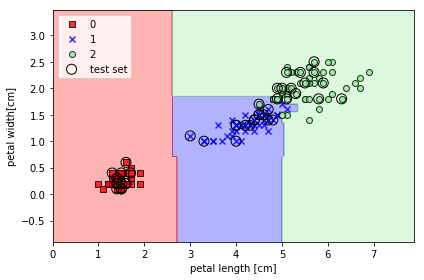

In [57]:
from sklearn.ensemble import RandomForestClassifier
# エントロピーを指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25, random_state=1, n_jobs=2)
# トレーニングデータにランダムフォレストのモデルを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

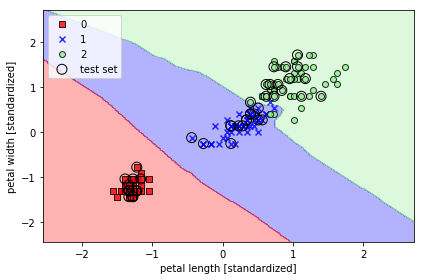

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# トレーニングデータにk近傍法モデルを適合させる
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()